In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Housing.csv')
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [5]:
object_columns = data.select_dtypes(include='object')
object_columns

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus
0,yes,no,no,no,yes,yes,furnished
1,yes,no,no,no,yes,no,furnished
2,yes,no,yes,no,no,yes,semi-furnished
3,yes,no,yes,no,yes,yes,furnished
4,yes,yes,yes,no,yes,no,furnished
...,...,...,...,...,...,...,...
540,yes,no,yes,no,no,no,unfurnished
541,no,no,no,no,no,no,semi-furnished
542,yes,no,no,no,no,no,unfurnished
543,no,no,no,no,no,no,furnished


In [8]:
def encode_and_bind(original_df, df_to_encode):
    """
    This function takes the original DataFrame and a DataFrame containing only object type columns.
    It performs one-hot encoding on the object columns and then binds the new encoded columns back to the original DataFrame, excluding 
    the original object columns.

    Parameters:
    - original_df: The original DataFrame.
    - df_to_encode: DataFrame containing only the columns of dtype 'object' to be encoded.

    Returns:
    - DataFrame with the original columns and new one-hot encoded columns.
    """
    # Perform one-hot encoding
    dummies = pd.get_dummies(df_to_encode, drop_first=True)
    
    dummies = dummies.astype(int)

    # Drop the original object columns from the original DataFrame
    original_df = original_df.drop(df_to_encode.columns, axis=1)

    # Concatenate the original DataFrame with the new dummy variables
    return pd.concat([original_df, dummies], axis=1)


In [9]:
new_data = encode_and_bind(data, object_columns)
print(new_data)

        price  area  bedrooms  bathrooms  stories  parking  mainroad_yes  \
0    13300000  7420         4          2        3        2             1   
1    12250000  8960         4          4        4        3             1   
2    12250000  9960         3          2        2        2             1   
3    12215000  7500         4          2        2        3             1   
4    11410000  7420         4          1        2        2             1   
..        ...   ...       ...        ...      ...      ...           ...   
540   1820000  3000         2          1        1        2             1   
541   1767150  2400         3          1        1        0             0   
542   1750000  3620         2          1        1        0             1   
543   1750000  2910         3          1        1        0             0   
544   1750000  3850         3          1        2        0             1   

     guestroom_yes  basement_yes  hotwaterheating_yes  airconditioning_yes  \
0        

In [10]:
# Split the data into features (X) and target variable (y)
X = new_data.drop('price', axis=1)
y = new_data['price']

In [29]:
# Create polynomial features
def convert_poly(degree): 
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X)

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test, X_poly


In [37]:
degrees = np.arange(2,8)
X_train, X_test, y_train, y_test, X_poly = convert_poly(2)

In [38]:
# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

In [39]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Squared Error: 1916484377799.1118
R^2 Score: 0.620841281377116


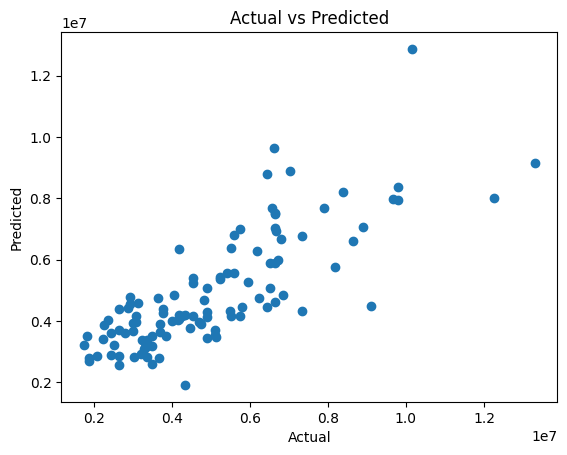

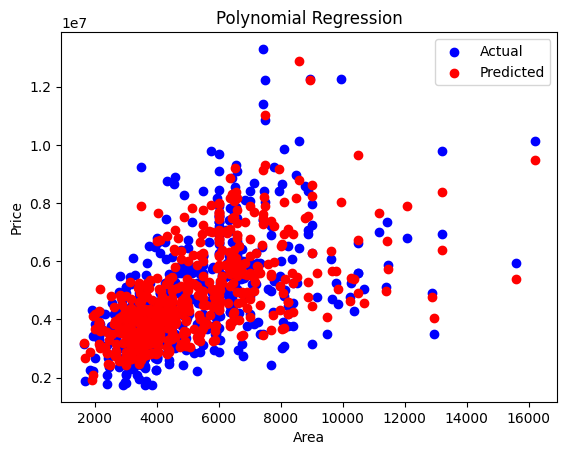

In [40]:
# Plotting the predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

# Plotting the polynomial curve
plt.scatter(new_data['area'], y, color='blue', label='Actual')
plt.scatter(new_data['area'], model.predict(X_poly), color='red', label='Predicted')
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Polynomial Regression')
plt.legend()
plt.show()


In [43]:
def LinReg():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    
    # Plotting the predicted vs actual values
    plt.scatter(y_test, y_pred)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs Predicted')
    plt.show()

Mean Squared Error: 1754318687330.6643
R^2 Score: 0.6529242642153184


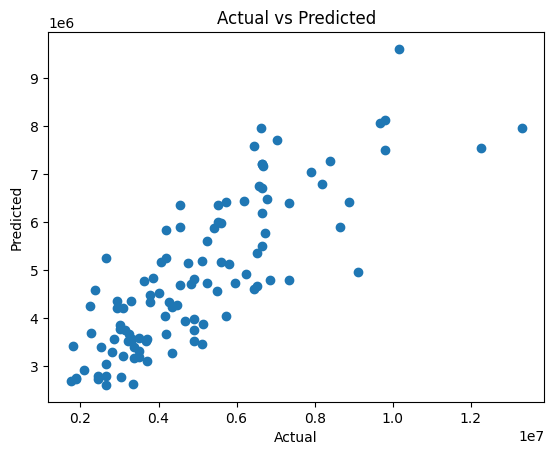

In [44]:
LinReg()